Activation energy is 2.76E-28 Joules
Prefactor is 100.163


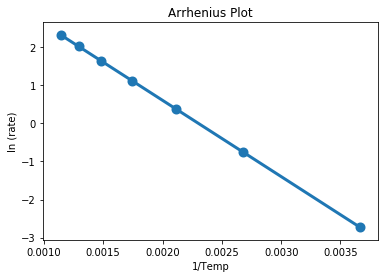

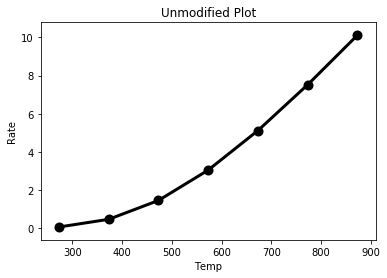

In [9]:
#rate problem

import matplotlib.pyplot as plt
import numpy as np
import math
from decimal import Decimal


#This is going to be a line because the original equation is k=Ae^(-Ea/(kb*T)). You
#can rewrite this as ln(k)=-Ea/kb *(1/T), which looks like a line, with "x" being (1/T)
#and "y" being ln(k). Thus, of course, when we graph it with these new variables, it
#looks like a line. Note - I found this on wikipedia. I am not claiming it as my own.
#All rights go to wikipedia, or whatever.
ratedata = np.transpose(np.loadtxt("RateT.txt",delimiter=","))
temp=ratedata[0]+273.15
rate=ratedata[1]
plt.plot(1/temp,np.log(rate),lw=3)
plt.scatter(1/temp,np.log(rate),lw=4)
plt.xlabel('1/Temp')
plt.ylabel('ln (rate)')
plt.title('Arrhenius Plot')
plt.savefig('testplott.png')

m, b = np.polyfit(1/temp, np.log(rate), 1)  #these just extract the relevant parameters
ae='%.2E' %Decimal((-1.3806*10**-31)*m)     #from the linear equation.
prefactor=round((math.e)**b,3)

print('Activation energy is',ae,'Joules')
print('Prefactor is',prefactor)


plt.figure(2)
plt.plot(temp,rate,'k',lw=3)
plt.scatter(temp,rate,c='k',lw=4)
plt.xlabel('Temp')
plt.ylabel('Rate')
plt.title('Unmodified Plot')
plt.show()




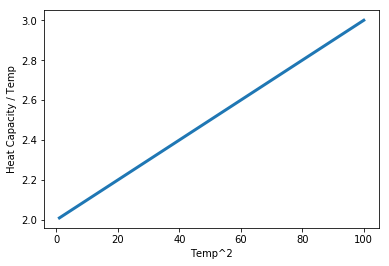

A= 2.0
B= 0.01


In [33]:
#heat capacity problem
import matplotlib.pyplot as plt

heatcapacitydata = np.transpose(np.loadtxt('HeatCapacity.txt',delimiter=","))
temps=heatcapacitydata[0]
heatcapacity=heatcapacitydata[1]
plt.plot(temps**2,heatcapacity/(temps),lw=3)
plt.xlabel('Temp^2')
plt.ylabel('Heat Capacity / Temp')
plt.show()

B,A=np.polyfit(temps**2,heatcapacity/(temps),1)
print('A=',round(A,5))
print('B=',round(B,10))



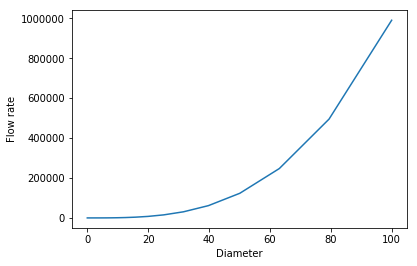

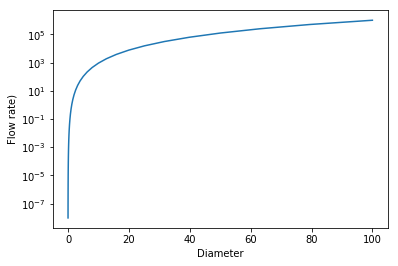

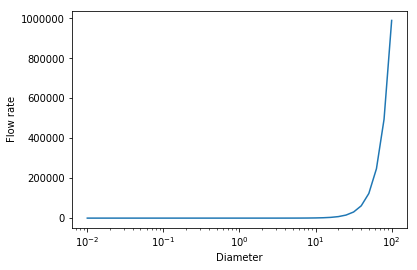

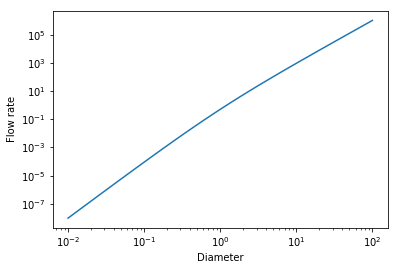

3.9692010197599186 -0.14388185861658603
3.035198858147107 -0.16109771221979874


In [31]:
#flow rate problem

flowratedata=np.transpose(np.loadtxt('Flow.txt',delimiter=','))
tube_diam=flowratedata[0]
flow_rate=flowratedata[1]

plt.figure(2)
plt.plot(tube_diam,flow_rate)
plt.xlabel('Diameter')
plt.ylabel('Flow rate')
plt.show()

plt.figure(2)
plt.semilogy()
plt.plot(tube_diam,flow_rate)
plt.xlabel('Diameter')
plt.ylabel('Flow rate)')
plt.show()

plt.figure(3)
plt.semilogx()
plt.plot(tube_diam,flow_rate)
plt.xlabel('Diameter')
plt.ylabel('Flow rate')
plt.show()

plt.figure(4)
plt.loglog()
plt.plot(tube_diam,flow_rate)
plt.xlabel('Diameter')
plt.ylabel('Flow rate')
plt.show()

#The last graph is the best because it's closest to a line, and because we aren't losing
#a ton of information by condensing a large part of the graph into such a small range
#that it looks like slope=0.


#For small d
slope1,intercept1=np.polyfit(np.log(tube_diam[0:10]),np.log(flow_rate[0:10]),1)

#ln(flowrate)=-.144+3.96*ln(diamtere)
#So, flowrate=(e^-.144)*e^(3.96*diameter)
print(slope1,intercept1)


#For large d
slope2,intercept2=np.polyfit(np.log(tube_diam[30:41]),np.log(flow_rate[30:41]),1)

#ln(flowrate)=-.161+3.035*ln(diamtere)
#So, flowrate=(e^-1.44)*e^(3.035*diameter)
print(slope2,intercept2)

#Note that these two laws are very close to the form flowrate=A*e^(4*diameter) and 
#flowrate=A*e^(3*diameter), which are much nicer and more fundamental looking.